<a href="https://colab.research.google.com/github/knc6/jarvis/blob/master/jarvis/db/static/jarvis_ff_explore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Exploring energetics and elastic-property data in JARVIS-FF


In [0]:
!pip install -U jarvis-tools

In [0]:
# More details in https://www.nature.com/articles/sdata2016125
import matplotlib
%matplotlib inline
import json
from pymatgen.core.composition import Composition
from pymatgen.analysis.phase_diagram import PDEntry, PhaseDiagram,PDPlotter
from jarvis.db.static.explore_db import get_ff_eneleast
data = get_ff_eneleast()

In [0]:
# Function to extract data
def get_entries_from_json(key=None,value=None,out=None,ff=None,json_f=None,PD=False):
    output=[[]]
 
    file=json_f
    if key=='search':
       output=[]
       try:
          old=value.split('-')
          el_list=sorted(old)
          value=('-'.join([item for item in el_list]))
       except:
          pass
    for d in data:
            x = {}
            options=['mpid','ehull','Bv','Gv','totenergy','energy','case-number','elastic_matrix','forcefield','composition']
            x[key] = str(d[key])
            x['mpid'] = str(d['mpid'])
            x['ehull'] = str(d['ehull'])
            x['Bv'] = str(d['Bv'])
            x['Gv'] = str(d['Gv'])
            x['totenergy'] = str(d['totenergy'])
            x['energy'] = str(d['energy'])
            x['case-number'] = str(d['case-number'])
            x['elastic_matrix'] = str(d['elastic_matrix'])
            x['forcefield'] = str(d['forcefield'])
            x['composition'] = str(d['composition'])
            #if key  != 'search':
            if x[key] ==value and  x['forcefield']==ff and PD == False:
                 output= x[out]
            if x[key] ==value and  ff==None and PD == False:
                 print (x[out],x['forcefield'])
            if x[key] ==value and  x['forcefield']==ff and PD==True:
                    output.append(PDEntry(Composition(x['composition']),float(x['totenergy'])))
            if key=='search'  and len(value.split('-')) >1 and PD ==True :
               els=value.split('-')
               for el in els:
                  if x[key] ==el and  x['forcefield']==ff:
                      output.append(PDEntry(Composition(x['composition']),float(x['totenergy'])))  
               for el1 in els:
                   for el2 in els:
                      if x[key] ==str(el1)+str('-')+str(el2) and  x['forcefield']==ff:
                          output.append(PDEntry(Composition(x['composition']),float(x['totenergy'])))  
                      if x[key] ==str(el2)+str('-')+str(el1) and  x['forcefield']==ff:
                          output.append(PDEntry(Composition(x['composition']),float(x['totenergy'])))  
               
    return output

# Convex-hull with classical force-fields (binary and ternary system examples are given below)

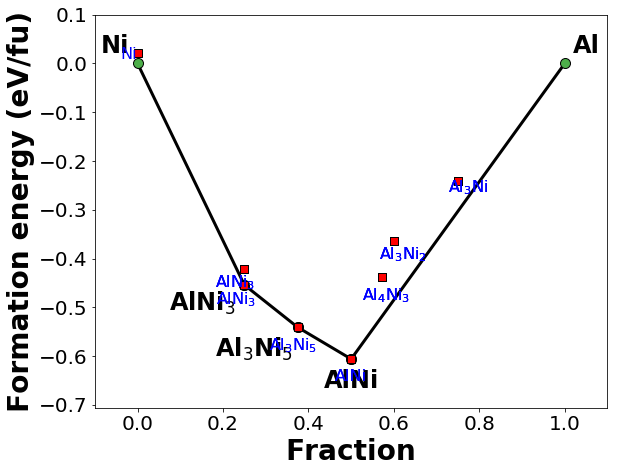

In [3]:
entries=get_entries_from_json(key='search',value='Al-Ni',out='energy',ff='Mishin-Ni-Al-2009.eam.alloy',json_f='data.json',PD=True)
pd = PhaseDiagram(entries)
plotter = PDPlotter(pd, show_unstable=True)
plotter.show()

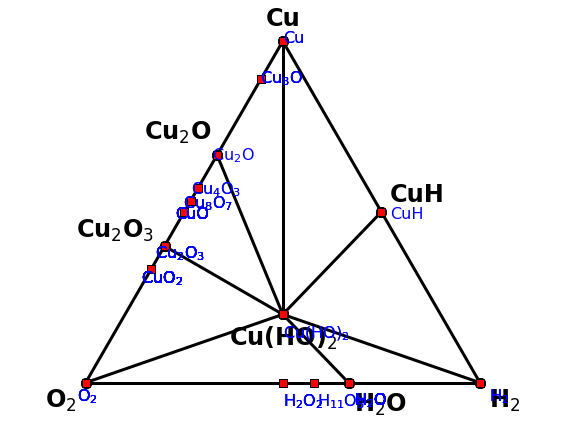

In [4]:
entries=get_entries_from_json(key='search',value='Cu-H-O',out='energy',ff='ffield.CuOCH.comb3',json_f='data.json',PD=True)
pd = PhaseDiagram(entries)
plotter = PDPlotter(pd, show_unstable=True)
plotter.show()

# Bulk-modulus data with all available force-fields for FCC Aluminum (mp-134)


In [5]:
# # https://materialsproject.org/materials/mp-134
bv=get_entries_from_json(key='mpid',value='mp-134',out='Bv',json_f='data.json')
bv

79.0 Al03.eam.alloy
78.9 Mishin-Ni-Al-2009.eam.alloy
80.8 mg-al-set.eam.alloy
81.6 ffield.comb3.NiAlO
79.0 Al99.eam.alloy
77.7 Al-Mg.eam.fs
96.6 Al_zhou.eam.alloy
79.3 NiAlH_jea.eam.alloy
100.4 NiAl02.eam.alloy
78.9 Mishin-Ni-Al-Co-2013.eam.alloy
142.7 Farkas_Nb-Ti-Al_1996.eam.alloy
84.2 CoAl.eam.alloy
73.9 alpb-setfl.eam.alloy
79.0 NiAl.eam.alloy
78.9 Mishin_updated-Ni-Al-Co-2013.eam.alloy
77.0 MDSL.eam.fs
78.9 Mishin-Al-Co-2013.eam.alloy
74.7 Al1.eam.fs
79.0 Zope-Ti-Al-2003.eam.alloy
78.9 Mishin_updated-Al-Co-2013.eam.alloy
79.6 Al-Fe.eam.fs
81.1 Al90Sm10_MendelevM_2014.eam.fs
80.0 Al.set
79.1 Al_wkg_MSMSE_2009.set
77.2 AlCu.eam.alloy


[[]]

# Elastic tensor for Al with different FFs

In [6]:
el_tens=get_entries_from_json(key='mpid',value='mp-134',out='elastic_matrix',ff='Al03.eam.alloy',json_f='data.json')
el_tens

"{'c3': [60.1, 60.1, 116.8, -0.0, -0.0, -0.0], 'c2': [60.1, 116.8, 60.1, -0.0, 0.0, 0.0], 'c1': [116.8, 60.1, 60.1, -0.0, 0.0, 0.0], 'c6': [0.0, 0.0, -0.0, 0.0, -0.0, 31.7], 'c5': [0.0, 0.0, -0.0, 0.0, 31.7, -0.0], 'c4': [-0.0, -0.0, -0.0, 31.7, 0.0, 0.0]}"

In [7]:
el_tens=get_entries_from_json(key='mpid',value='mp-134',out='elastic_matrix',json_f='data.json')

{'c3': [60.1, 60.1, 116.8, -0.0, -0.0, -0.0], 'c2': [60.1, 116.8, 60.1, -0.0, 0.0, 0.0], 'c1': [116.8, 60.1, 60.1, -0.0, 0.0, 0.0], 'c6': [0.0, 0.0, -0.0, 0.0, -0.0, 31.7], 'c5': [0.0, 0.0, -0.0, 0.0, 31.7, -0.0], 'c4': [-0.0, -0.0, -0.0, 31.7, 0.0, 0.0]} Al03.eam.alloy
{'c3': [61.5, 61.5, 113.8, 0.0, -0.0, -0.0], 'c2': [61.5, 113.8, 61.5, 0.0, -0.0, -0.0], 'c1': [113.8, 61.5, 61.5, -0.0, -0.0, 0.0], 'c6': [0.0, -0.0, -0.0, 0.0, 0.0, 31.6], 'c5': [-0.0, -0.0, -0.0, -0.0, 31.6, 0.0], 'c4': [-0.0, 0.0, 0.0, 31.6, -0.0, 0.0]} Mishin-Ni-Al-2009.eam.alloy
{'c3': [62.2, 62.2, 118.0, 0.0, -0.0, 0.0], 'c2': [62.2, 118.0, 62.2, 0.0, -0.0, 0.0], 'c1': [118.0, 62.2, 62.2, 0.0, -0.0, 0.0], 'c6': [0.0, 0.0, 0.0, -0.0, 0.0, 36.7], 'c5': [-0.0, -0.0, -0.0, 0.0, 36.7, 0.0], 'c4': [0.0, 0.0, 0.0, 36.7, 0.0, -0.0]} mg-al-set.eam.alloy
{'c3': [65.9, 65.9, 112.9, 0.0, 0.0, -0.0], 'c2': [65.9, 112.9, 65.9, -0.0, -0.0, 0.0], 'c1': [112.9, 65.9, 65.9, -0.0, -0.0, 0.0], 'c6': [0.0, 0.0, -0.0, -0.0, -0.0, 39.4

In [8]:
all_searches=[]
for i in data:
    search=i['search']
    if search not in all_searches:
      all_searches.append(i['search'])
len(all_searches)


167

In [9]:
all_searches

['Al',
 'Cu',
 'Ag',
 'Ag-Cu',
 'Fe',
 'Ni',
 'Fe-Ni',
 'Cr',
 'Cr-Ni',
 'Ta',
 'Zr',
 'Ni-Zr',
 'Ru',
 'Pd',
 'H',
 'H-Pd',
 'O',
 'Ti',
 'O-Ti',
 'Ga',
 'N',
 'Ga-N',
 'Al-Ni',
 'Mg',
 'Al-Mg',
 'P',
 'Fe-P',
 'Co',
 'Mo',
 'S',
 'Mo-S',
 'Si',
 'O-Si',
 'C',
 'C-H',
 'C-O',
 'H-O',
 'C-H-O',
 'Zn',
 'O-Zn',
 'Ni-O',
 'Al-O',
 'Al-Ni-O',
 'Cu-Zr',
 'Au',
 'H-Ni',
 'Al-H',
 'W',
 'Cu-O',
 'Cu-H',
 'C-Cu-O',
 'Cu-H-O',
 'C-Cu-H-O',
 'Hf',
 'Cu-Ti',
 'Cu-Si',
 'Hf-Si',
 'Hf-O',
 'Cu-O-Ti',
 'Cu-O-Si',
 'Al-Co',
 'Nb',
 'Nb-Ti',
 'Al-Nb',
 'Al-Ti',
 'Fe-O',
 'C-Fe',
 'Fe-H',
 'C-Fe-O',
 'Fe-H-O',
 'C-Si',
 'Ag-Pd',
 'Pb',
 'C-N',
 'H-N',
 'N-O',
 'C-H-N',
 'H-N-O',
 'V',
 'O-V',
 'C-V',
 'H-V',
 'C-O-V',
 'H-O-V',
 'Cd',
 'Te',
 'Hg',
 'Se',
 'Cd-Zn',
 'Cd-Te',
 'Cd-Hg',
 'Cd-S',
 'Cd-Se',
 'Te-Zn',
 'Hg-Zn',
 'S-Zn',
 'Se-Zn',
 'Hg-Te',
 'Hg-S',
 'Hg-Se',
 'S-Se',
 'Cd-Te-Zn',
 'Cd-S-Zn',
 'Pt',
 'B',
 'B-N',
 'B-C',
 'B-C-N',
 'Ge',
 'Fe-V',
 'Al-Fe',
 'H-Zn',
 'H-O-Zn',
 'Li',
 'Na',
